In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

In [10]:
print("📥 Loading datasets...")
properties_2016 = pd.read_csv('/content/drive/MyDrive/zillow-prize-1/properties_2016.csv', low_memory=False)
properties_2017 = pd.read_csv('/content/drive/MyDrive/zillow-prize-1/properties_2017.csv', low_memory=False)
train_2016 = pd.read_csv('/content/drive/MyDrive/zillow-prize-1/train_2016_v2.csv', low_memory=False)
train_2017 = pd.read_csv('/content/drive/MyDrive/zillow-prize-1/train_2017.csv', low_memory=False)
sample_submission = pd.read_csv('/content/drive/MyDrive/zillow-prize-1/sample_submission.csv', low_memory=False)
print("✅ Data loaded!")

📥 Loading datasets...
✅ Data loaded!


In [11]:
properties_2017.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [12]:
train_2017.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [13]:
sample_submission.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [58]:
# Display basic information about the datasets
print("Properties 2016 shape:", properties_2016.shape)
print("Properties 2017 shape:", properties_2017.shape)
print("Train 2016 shape:", train_2016.shape)
print("Train 2017 shape:", train_2017.shape)
print("Sample Submission shape:", sample_submission.shape)

Properties 2016 shape: (2985217, 34)
Properties 2017 shape: (2985217, 34)
Train 2016 shape: (90275, 3)
Train 2017 shape: (77613, 3)
Sample Submission shape: (2985217, 7)


In [60]:
train_2017.isnull()

,parcelid,logerror,transactiondate
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
77608,False,False,False
77609,False,False,False
77610,False,False,False
77611,False,False,False


In [61]:
def explore_data(df, name):
    """
    Function to explore a dataset.
    - Prints basic information
    - Shows missing values percentage
    - Displays numerical feature distributions
    """
    print(f"\n🔍 Exploring Dataset: {name}")
    print("-" * 75)

    # General info
    print(f"Shape: {df.shape}")
    print("\nColumns & Data Types:")
    print(df.dtypes.value_counts())

    # Missing values analysis
    missing_percent = df.isnull().mean() * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)


    if not missing_percent.empty:
        print("\n📉 Missing Values (%):")
        print(missing_percent)  # Show columns with missing values

        plt.figure(figsize=(10, 4))
        sns.barplot(x=missing_percent.index, y=missing_percent.values)
        plt.xticks(rotation=90)
        plt.ylabel("Missing Values (%)")
        plt.xlabel("Column Names")
        plt.title(f"Missing Data in {name}")
        plt.show()

    # Distribution of numerical features
    df.hist(figsize=(20, 20), bins=30)
    plt.suptitle(f"Numerical Feature Distributions - {name}", fontsize=14)
    plt.show()


🔍 Exploring Dataset: properties_2017
---------------------------------------------------------------------------
Shape: (2985217, 34)

Columns & Data Types:
float64    31
object      2
int64       1
Name: count, dtype: int64

📉 Missing Values (%):
numberofstories                 77.030950
airconditioningtypeid           72.686676
garagetotalsqft                 70.152656
garagecarcnt                    70.152656
regionidneighborhood            61.251025
heatingorsystemtypeid           37.385992
buildingqualitytypeid           34.966369
unitcnt                         33.638258
propertyzoningdesc              33.590389
lotsizesquarefeet                9.135215
finishedsquarefeet12             8.858016
fullbathcnt                      3.924539
calculatedbathnbr                3.924539
censustractandblock              2.511878
regionidcity                     2.081189
landtaxvaluedollarcnt            2.007425
yearbuilt                        1.602329
structuretaxvaluedollarcnt       1.55

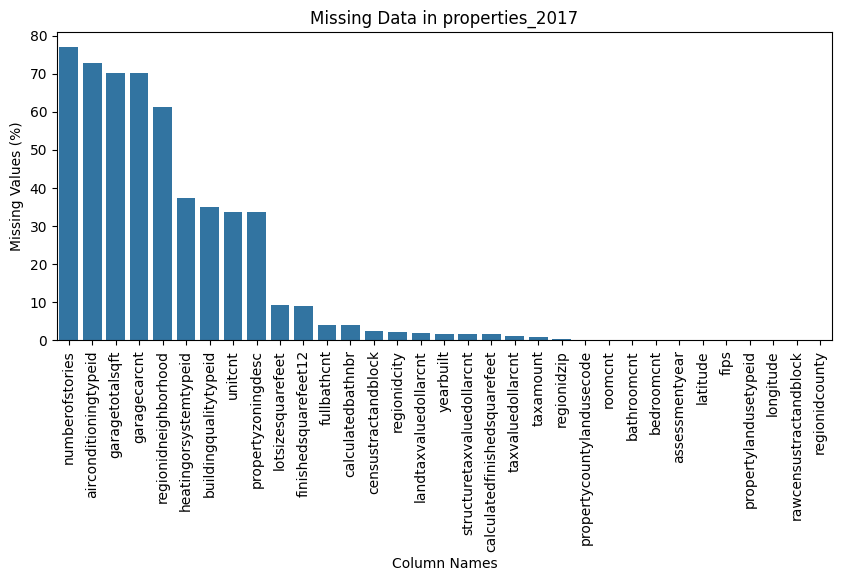

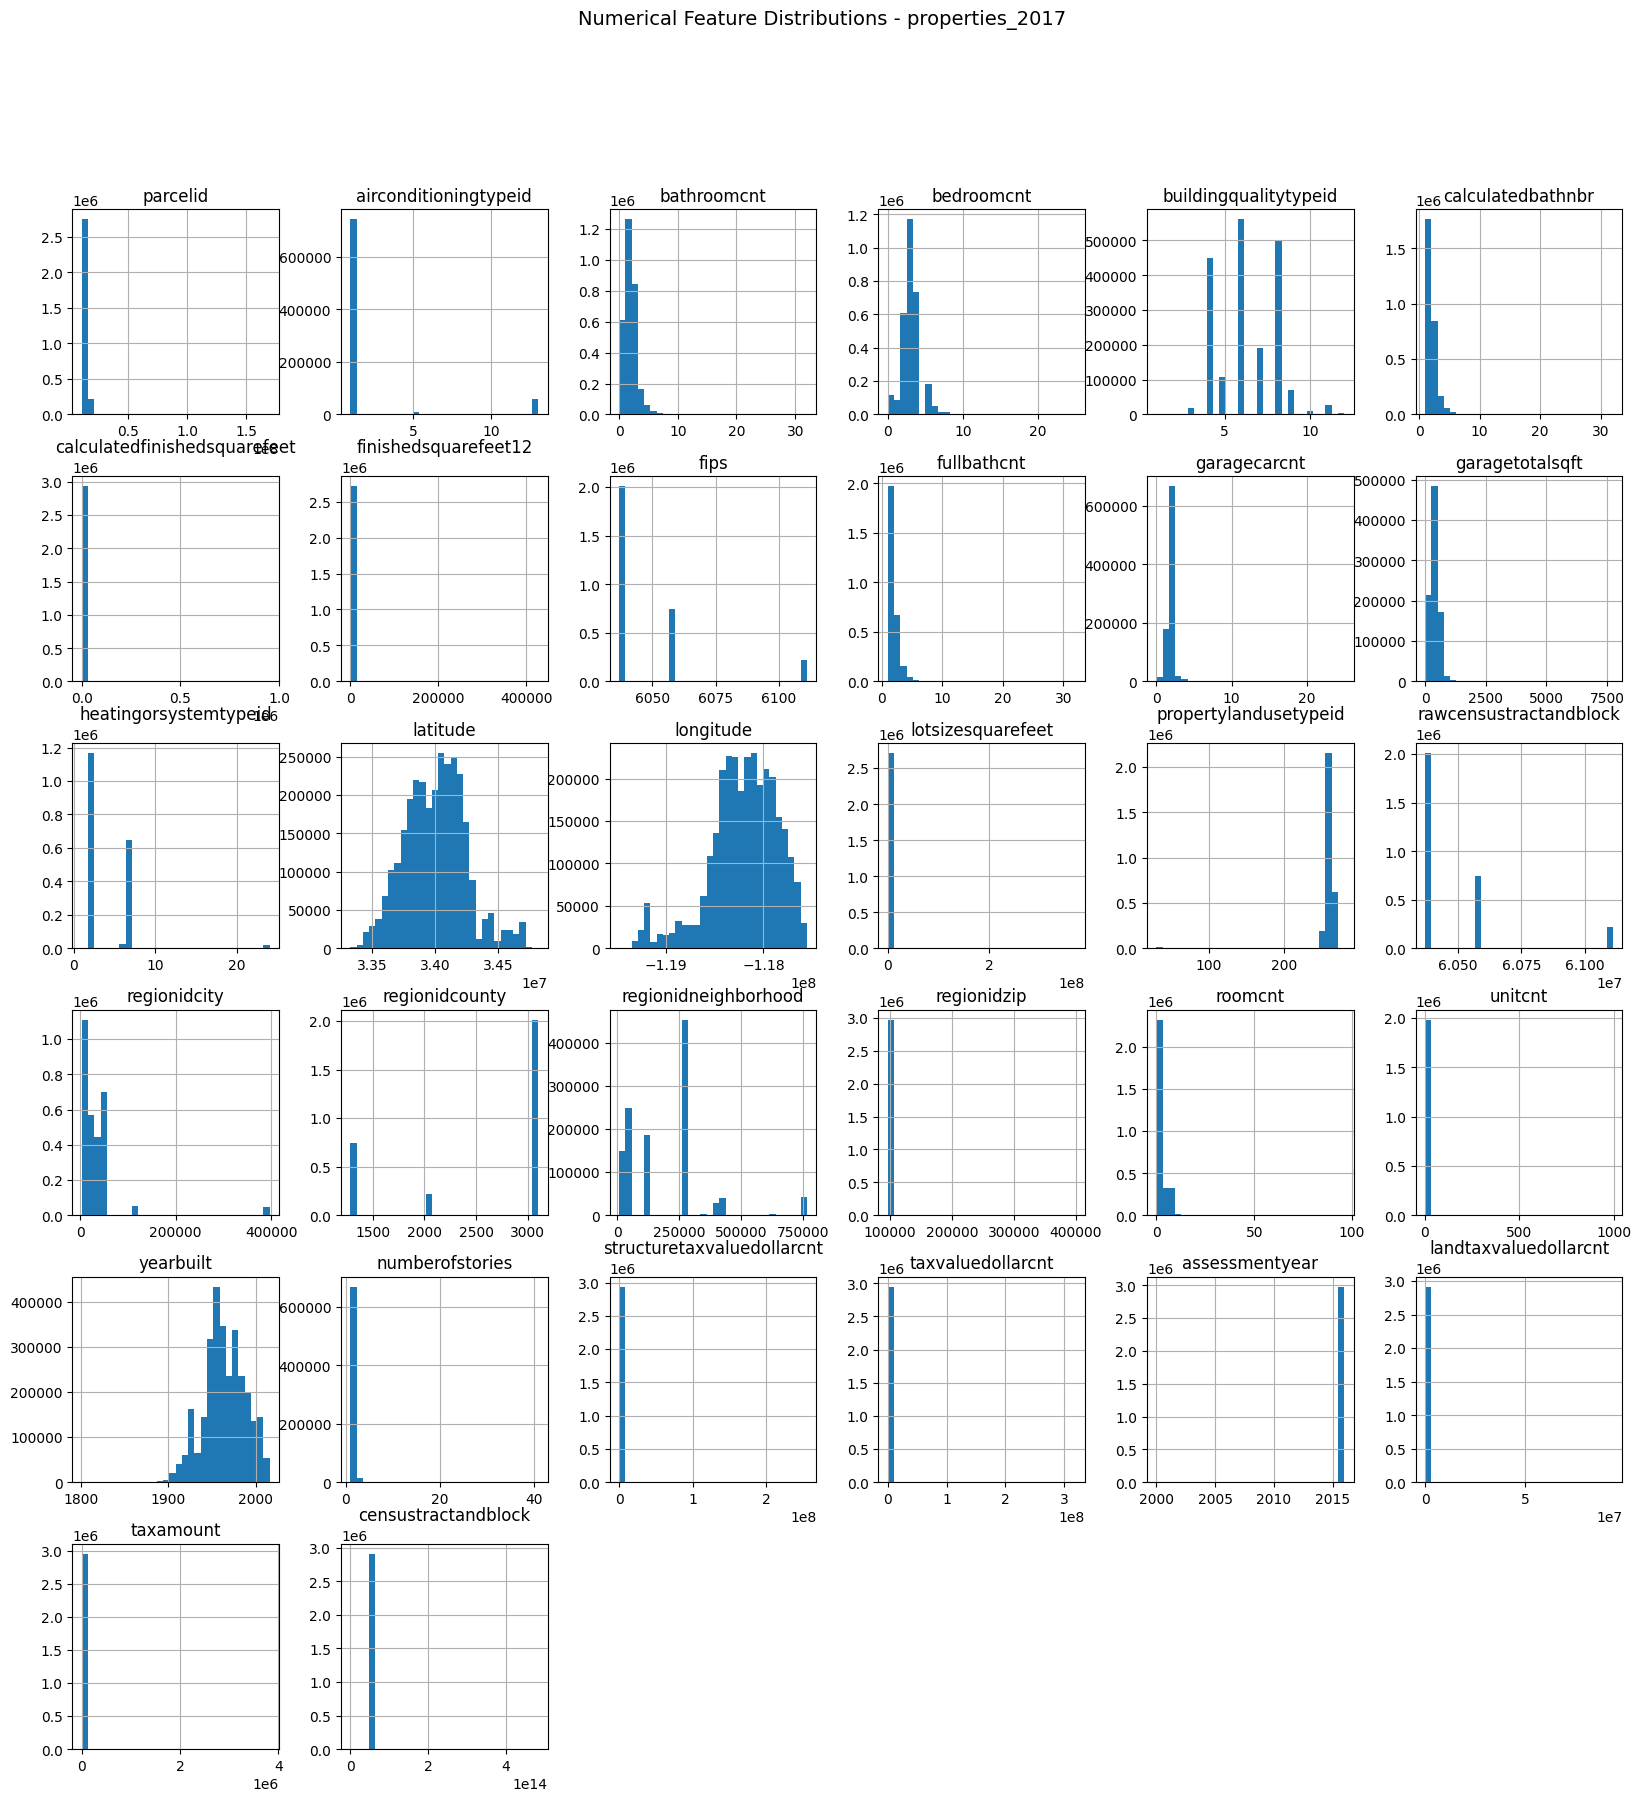

In [62]:
explore_data(properties_2017,"properties_2017")

In [67]:
properties_2017.shape

(2985217, 34)

In [18]:
def drop_high_missing_cols(df, name, threshold=0.8):
    """
    Drops columns with missing values above a certain threshold.
    :param df: DataFrame to process
    :param name: Name of the dataset for printing
    :param threshold: Proportion of missing values to decide column removal
    :return: Cleaned DataFrame
    """
    missing_percent = df.isnull().mean()
    cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()

    print(f"🛑 Dropping {len(cols_to_drop)} columns from {name} (>{threshold*100}% missing values)")

    return df.drop(columns=cols_to_drop)

# Apply function to both properties datasets
properties_2016 = drop_high_missing_cols(properties_2016, "Properties 2016")
properties_2017 = drop_high_missing_cols(properties_2017, "Properties 2017")

# Display shape of the new datasets
print(f"Properties 2016 shape: {properties_2016.shape}")
print(f"Properties 2017 shape: {properties_2017.shape}")

🛑 Dropping 24 columns from Properties 2016 (>80.0% missing values)
🛑 Dropping 24 columns from Properties 2017 (>80.0% missing values)
Properties 2016 shape: (2985217, 34)
Properties 2017 shape: (2985217, 34)


In [20]:
properties_2016.dtypes


,0
parcelid,int64
airconditioningtypeid,float64
bathroomcnt,float64
bedroomcnt,float64
buildingqualitytypeid,float64
calculatedbathnbr,float64
calculatedfinishedsquarefeet,float64
finishedsquarefeet12,float64
fips,float64
fullbathcnt,float64


In [21]:
properties_2017.dtypes

,0
parcelid,int64
airconditioningtypeid,float64
bathroomcnt,float64
bedroomcnt,float64
buildingqualitytypeid,float64
calculatedbathnbr,float64
calculatedfinishedsquarefeet,float64
finishedsquarefeet12,float64
fips,float64
fullbathcnt,float64


In [22]:
def compare_datasets(df1, df2, name1='Dataset 1', name2='Dataset 2'):
    """
    Compares two datasets to find similarities and differences.
    - Checks if they have the same columns.
    - Identifies columns that exist in one but not the other.
    - Compares summary statistics.
    - Checks if they have the same parcelId values.
    """
    print(f"\n🔍 Comparing {name1} and {name2}")
    print("-" * 50)

    # Check if columns are the same
    cols1, cols2 = set(df1.columns), set(df2.columns)
    common_cols = cols1.intersection(cols2)
    diff_cols1 = cols1 - cols2
    diff_cols2 = cols2 - cols1

    print(f"✅ Common columns: {len(common_cols)}")
    print(f"❌ Columns in {name1} but not in {name2}: {len(diff_cols1)} -> {diff_cols1}")
    print(f"❌ Columns in {name2} but not in {name1}: {len(diff_cols2)} -> {diff_cols2}")

    # Compare basic statistics of common columns
    common_df1 = df1[list(common_cols)].describe()
    common_df2 = df2[list(common_cols)].describe()

    print("\n📊 Summary Statistics of Common Columns:")
    diff_stats = common_df1.compare(common_df2)
    if diff_stats.empty:
        print("✅ No statistical differences found between common columns!")
    else:
        print(diff_stats)

    # Check parcelId differences
    if 'parcelid' in common_cols:
        parcel_diff = set(df1['parcelid']) ^ set(df2['parcelid'])
        print(f"\n📌 ParcelId Differences: {len(parcel_diff)} unique parcelIds found in one dataset but not the other.")
    else:
        print("⚠ parcelid column not found in both datasets.")

In [23]:
compare_datasets(train_2016, train_2017, 'train 2016', 'train 2017')



🔍 Comparing train 2016 and train 2017
--------------------------------------------------
✅ Common columns: 3
❌ Columns in train 2016 but not in train 2017: 0 -> set()
❌ Columns in train 2017 but not in train 2016: 0 -> set()

📊 Summary Statistics of Common Columns:
           logerror                    parcelid              
               self         other          self         other
count  90275.000000  77613.000000  9.027500e+04  7.761300e+04
mean       0.011457      0.016755  1.298466e+07  1.300781e+07
std        0.161079      0.170887  2.504510e+06  3.518717e+06
min       -4.605000     -4.655420  1.071174e+07  1.071186e+07
25%       -0.025300     -0.024325  1.155950e+07  1.153821e+07
50%        0.006000      0.006670  1.254734e+07  1.253004e+07
75%        0.039200      0.039295  1.422755e+07  1.421101e+07
max        4.737000      5.262999  1.629608e+08  1.676893e+08

📌 ParcelId Differences: 162856 unique parcelIds found in one dataset but not the other.


In [24]:
compare_datasets(properties_2016, properties_2017, 'properties 2016', 'properties 2017')



🔍 Comparing properties 2016 and properties 2017
--------------------------------------------------
✅ Common columns: 34
❌ Columns in properties 2016 but not in properties 2017: 0 -> set()
❌ Columns in properties 2017 but not in properties 2016: 0 -> set()

📊 Summary Statistics of Common Columns:
      propertylandusetypeid               landtaxvaluedollarcnt                \
                       self         other                  self         other   
count          2.973780e+06  2.982285e+06          2.917484e+06  2.925291e+06   
mean           2.600484e+02  2.600508e+02          2.524780e+05  2.684558e+05   
std            1.590817e+01  1.593121e+01          4.450132e+05  4.865097e+05   
min                     NaN           NaN                   NaN           NaN   
25%                     NaN           NaN          7.483600e+04  7.970000e+04   
50%                     NaN           NaN          1.670420e+05  1.766190e+05   
75%                     NaN           NaN          3.0


🔍 Analyzing Variable Types in Properties 2016
--------------------------------------------------
parcelid                          int64
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood  

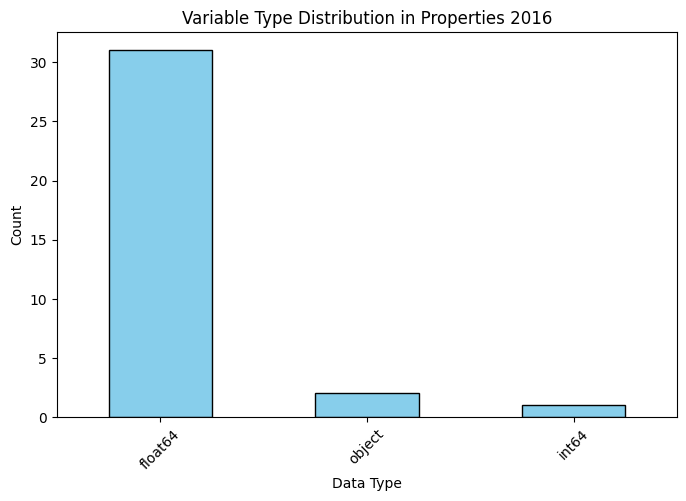


🔍 Analyzing Variable Types in Properties 2017
--------------------------------------------------
parcelid                          int64
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood  

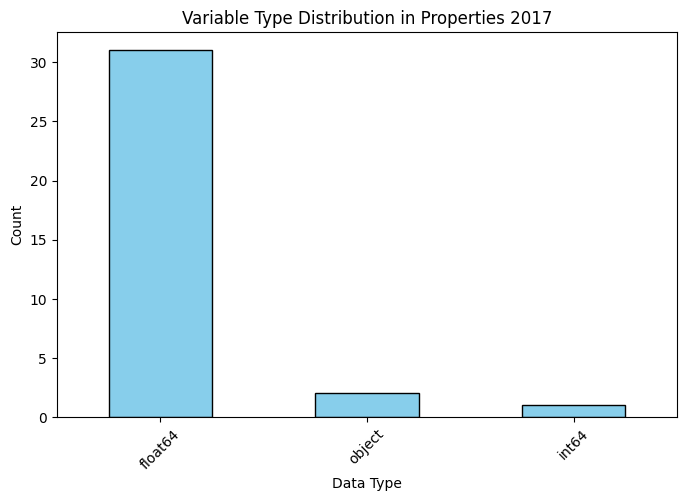

In [25]:
def analyze_variable_types(df, name):
    """
    Analyzes the types of variables in the dataset.
    - Counts numerical, categorical, and other types of variables.
    """
    print(f"\n🔍 Analyzing Variable Types in {name}")
    print("-" * 50)

    var_types = df.dtypes.value_counts()
    print(df.dtypes)
    print(var_types)

    # Plot distribution of variable types
    plt.figure(figsize=(8, 5))
    var_types.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Variable Type Distribution in {name}")
    plt.xlabel("Data Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Run analysis on both properties datasets
analyze_variable_types(properties_2016, "Properties 2016")
analyze_variable_types(properties_2017, "Properties 2017")

In [64]:
properties_2017.shape

(2985217, 34)

In [66]:
# Columns to drop
drop_cols = [
    'calculatedbathnbr', 'fullbathcnt', 'latitude', 'longitude',
    'propertycountylandusecode', 'censustractandblock', 'regionidneighborhood',
    'unitcnt', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'assessmentyear', 'airconditioningtypeid',
    'heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc'
]

# Drop the columns
properties_2016_cleaned = properties_2016.drop(columns=drop_cols, errors="ignore")
properties_2017_cleaned = properties_2017.drop(columns=drop_cols, errors="ignore")
# properties_2016_cleaned.shape
properties_2017_cleaned.shape

(2985217, 18)

In [28]:
properties_2016_cleaned.head(10)


,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,numberofstories,taxamount
0,10754147,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,85768.0,269.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,NaN,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,4083.0,261.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,NaN,NaN,NaN
2,10843547,0.0,0.0,73026.0,NaN,6037.0,NaN,NaN,63085.0,47.0,6.037703e+07,51617.0,3101.0,96095.0,0.0,NaN,NaN,20800.37
3,10859147,0.0,0.0,5068.0,NaN,6037.0,NaN,NaN,7521.0,47.0,6.037141e+07,12447.0,3101.0,96424.0,0.0,1948.0,1.0,14557.57
4,10879947,0.0,0.0,1776.0,NaN,6037.0,NaN,NaN,8512.0,31.0,6.037123e+07,12447.0,3101.0,96450.0,0.0,1947.0,NaN,5725.17
5,10898347,0.0,0.0,2400.0,NaN,6037.0,NaN,NaN,2500.0,31.0,6.037125e+07,12447.0,3101.0,96446.0,0.0,1943.0,1.0,3661.28
6,10933547,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,NaN,260.0,6.037144e+07,12447.0,3101.0,96049.0,0.0,NaN,NaN,6773.34
7,10940747,0.0,0.0,3611.0,NaN,6037.0,NaN,NaN,5333.0,31.0,6.037311e+07,396054.0,3101.0,96434.0,0.0,1946.0,1.0,7857.84
8,10954547,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,145865.0,269.0,6.037310e+07,396054.0,3101.0,96436.0,0.0,NaN,NaN,NaN
9,10976347,0.0,0.0,3754.0,NaN,6037.0,NaN,NaN,7494.0,31.0,6.037320e+07,47547.0,3101.0,96366.0,0.0,1978.0,1.0,4054.76


In [29]:
properties_2017_cleaned.head(10)


,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,numberofstories,taxamount
0,10754147,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,85768.0,269.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,NaN,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,4083.0,261.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,NaN,NaN,NaN
2,10843547,0.0,0.0,73026.0,NaN,6037.0,NaN,NaN,63085.0,47.0,6.037703e+07,51617.0,3101.0,96095.0,0.0,1959.0,1.0,20800.37
3,10859147,0.0,0.0,5068.0,NaN,6037.0,NaN,NaN,7521.0,47.0,6.037141e+07,12447.0,3101.0,96424.0,0.0,1948.0,1.0,14557.57
4,10879947,0.0,0.0,1776.0,NaN,6037.0,NaN,NaN,8512.0,31.0,6.037123e+07,12447.0,3101.0,96450.0,0.0,1947.0,1.0,5725.17
5,10898347,0.0,0.0,2400.0,NaN,6037.0,NaN,NaN,2500.0,31.0,6.037125e+07,12447.0,3101.0,96446.0,0.0,1943.0,1.0,3661.28
6,10933547,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,NaN,260.0,6.037144e+07,12447.0,3101.0,96049.0,0.0,NaN,NaN,6773.34
7,10940747,0.0,0.0,3611.0,NaN,6037.0,NaN,NaN,5333.0,31.0,6.037311e+07,396054.0,3101.0,96434.0,0.0,1946.0,1.0,7857.84
8,10954547,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,145865.0,269.0,6.037310e+07,396054.0,3101.0,96436.0,0.0,NaN,NaN,NaN
9,10976347,0.0,0.0,3754.0,NaN,6037.0,NaN,NaN,7494.0,31.0,6.037320e+07,47547.0,3101.0,96366.0,0.0,1978.0,1.0,4054.76


In [31]:
 #Define replacement strategies
fill_mode = [
    'regionidcity', 'regionidzip', 'fips', 'propertylandusetypeid',
    'rawcensustractandblock', 'regionidcounty'
]
fill_median = [
    'lotsizesquarefeet', 'finishedsquarefeet12', 'yearbuilt',
    'calculatedfinishedsquarefeet', 'taxamount', 'roomcnt',
    'bathroomcnt', 'bedroomcnt'
]
fill_zero = ['numberofstories', 'garagecarcnt', 'garagetotalsqft']

# Apply mode filling
for col in fill_mode:
    properties_2017_cleaned[col] = properties_2017_cleaned[col].fillna(properties_2016[col].mode()[0])
    properties_2016_cleaned[col] = properties_2016_cleaned[col].fillna(properties_2016[col].mode()[0])

# Apply median filling
for col in fill_median:
    properties_2017_cleaned[col] = properties_2017_cleaned[col].fillna(properties_2016[col].median())
    properties_2016_cleaned[col] = properties_2016_cleaned[col].fillna(properties_2016[col].median())

# Apply zero filling
for col in fill_zero:
    properties_2017_cleaned[col] = properties_2017_cleaned[col].fillna(0)
    properties_2016_cleaned[col] = properties_2016_cleaned[col].fillna(0)

print("✅ Missing values handled. Cleaned dataset")

✅ Missing values handled. Cleaned dataset


In [32]:
def list_columns(df, name):
    """
    Prints all columns in the dataset along with their data types.
    """
    print(f"\n📊 Columns in {name}:")
    print("-" * 50)
    print(df.dtypes)
    print("\nTotal columns:", df.shape[1])

# List columns for both properties datasets
list_columns(properties_2016_cleaned, "Properties 2016")
list_columns(properties_2017_cleaned, "Properties 2017")


📊 Columns in Properties 2016:
--------------------------------------------------
parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
garagecarcnt                    float64
garagetotalsqft                 float64
lotsizesquarefeet               float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
numberofstories                 float64
taxamount                       float64
dtype: object

Total columns: 18

📊 Columns in Properties 2017:
--------------------------------------------------
parcelid                          int64
bathroomcnt                     float64
bed

In [33]:
def merge_train_properties(train_df, properties_df, name):
    """
    Merges train data with property data on parcelid.
    """
    print(f"\n🔗 Merging {name} train data with properties data")
    merged_df = train_df.merge(properties_df, on='parcelid', how='left')
    print(f"✅ Merged dataset shape: {merged_df.shape}")
    return merged_df

# Merge train datasets with properties datasets
train_2016_merged = merge_train_properties(train_2016, properties_2016_cleaned, "2016")
train_2017_merged = merge_train_properties(train_2017, properties_2017_cleaned, "2017")


🔗 Merging 2016 train data with properties data
✅ Merged dataset shape: (90275, 20)

🔗 Merging 2017 train data with properties data
✅ Merged dataset shape: (77613, 20)


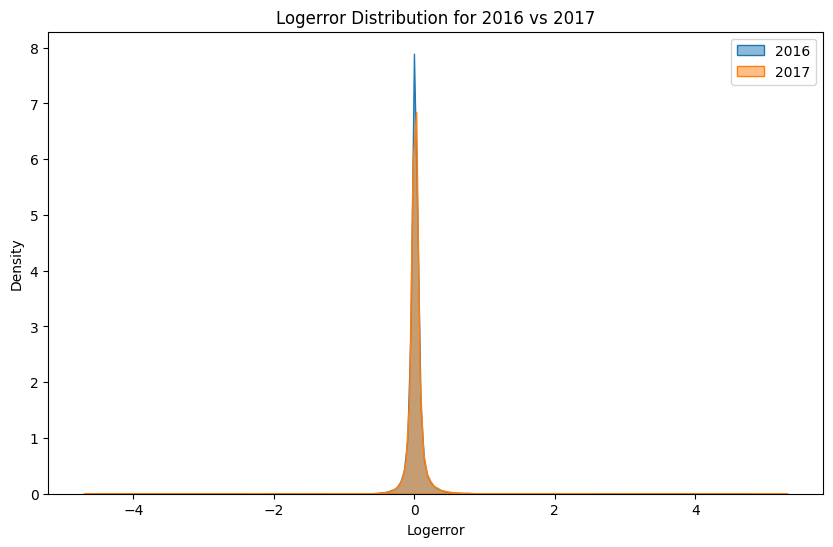

In [34]:
plt.figure(figsize=(10, 6))

sns.kdeplot(train_2016['logerror'], label='2016', fill=True, alpha=0.5)
sns.kdeplot(train_2017['logerror'], label='2017', fill=True, alpha=0.5)

plt.title("Logerror Distribution for 2016 vs 2017")
plt.xlabel("Logerror")
plt.ylabel("Density")
plt.legend()
plt.show()

In [35]:
# Combine train datasets from 2016 and 2017 into one
print("\n🔗 Combining 2016 and 2017 train datasets")
train_properties = pd.concat([train_2016_merged, train_2017_merged], axis=0).reset_index(drop=True)
print(f"✅ Combined dataset shape: {train_properties.shape}")


🔗 Combining 2016 and 2017 train datasets
✅ Combined dataset shape: (167888, 20)


In [36]:
train_properties.head()


,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,numberofstories,taxamount
0,11016594,0.0276,2016-01-01,2.0,3.0,1684.0,1684.0,6037.0,0.0,0.0,7528.0,261.0,6.037107e+07,12447.0,3101.0,96370.0,0.0,1959.0,0.0,6735.88
1,14366692,-0.1684,2016-01-01,3.5,4.0,2263.0,2263.0,6059.0,2.0,468.0,3643.0,261.0,6.059052e+07,32380.0,1286.0,96962.0,0.0,2014.0,0.0,10153.02
2,12098116,-0.0040,2016-01-01,3.0,2.0,2217.0,2217.0,6037.0,0.0,0.0,11423.0,261.0,6.037464e+07,47019.0,3101.0,96293.0,0.0,1940.0,0.0,11484.48
3,12643413,0.0218,2016-01-02,2.0,2.0,839.0,839.0,6037.0,0.0,0.0,70859.0,266.0,6.037296e+07,12447.0,3101.0,96222.0,0.0,1987.0,0.0,3048.74
4,14432541,-0.0050,2016-01-02,2.5,4.0,2283.0,2283.0,6059.0,2.0,598.0,6000.0,261.0,6.059042e+07,17686.0,1286.0,96961.0,8.0,1981.0,2.0,5488.96


In [37]:
# Convert 'transactiondate' to YYYYMM format
train_properties['transactiondate'] = pd.to_datetime(train_properties['transactiondate'])
train_properties['transactiondate'] = train_properties['transactiondate'].dt.strftime('%Y%m').astype(int)

print("✅ Converted 'transactiondate' to YYYYMM format.")

✅ Converted 'transactiondate' to YYYYMM format.


In [39]:
# 🎯 Drop outliers outside -0.4 and 0.4
min_log, max_log = -0.4, 0.4

train_properties_v2 = train_properties[
    (train_properties["logerror"] >= min_log) &
    (train_properties["logerror"] <= max_log)
]

In [40]:
# Total before filtering
initial_count = train_properties.shape[0]

# Total after filtering
filtered_count = train_properties_v2.shape[0]

print(f"Kept {filtered_count} rows out of {initial_count}.")
print(f"Dropped {initial_count - filtered_count} rows as outliers.")

# If you want to inspect them directly:
removed = train_properties[
    (train_properties["logerror"] < min_log) |
    (train_properties["logerror"] > max_log)
]
print(removed["logerror"].describe())
# and maybe look at the first few:
print(removed.head())


Kept 164299 rows out of 167888.
Dropped 3589 rows as outliers.
count    3589.000000
mean        0.290109
std         0.947725
min        -4.655420
25%        -0.470574
50%         0.476900
75%         0.730400
max         5.262999
Name: logerror, dtype: float64
     parcelid  logerror  transactiondate  bathroomcnt  bedroomcnt  \
102  17118736   -0.4095           201601          1.0         1.0   
124  12221552   -0.6368           201601          1.0         2.0   
132  12727119   -0.4277           201601          1.0         4.0   
212  10815023    0.4941           201601          4.0         4.0   
277  12689469   -0.4080           201601          2.0         2.0   

     calculatedfinishedsquarefeet  finishedsquarefeet12    fips  garagecarcnt  \
102                         718.0                 718.0  6111.0           1.0   
124                         936.0                 936.0  6037.0           0.0   
132                        1012.0                1012.0  6037.0           0.0   

In [41]:
from sklearn.model_selection import train_test_split

# Extract year and month for filtering
year_month = train_properties_v2['transactiondate']

# Split early months (January - September) from both years
early_data = train_properties_v2[year_month % 100 <= 9]

# Split late months (October - December) from 2016 only
late_2016 = train_properties_v2[(year_month // 100 == 2016) & (year_month % 100 >= 10)]

# Randomly select 80% of early_data for training, 20% for testing
train_main, test_main = train_test_split(early_data, test_size=0.2, random_state=42)

# Randomly select 10% of late_2016 for training, rest 90% goes to testing
late_2016_train, late_2016_test = train_test_split(late_2016, test_size=0.9, random_state=42)

# Combine train_main with 10% of late_2016 to form the final training set
train_final = pd.concat([train_main, late_2016_train]).reset_index(drop=True)

# Combine test_main with 90% of late_2016 to form the final testing set
test_final = pd.concat([test_main, late_2016_test]).reset_index(drop=True)

# Remove 'parcelid' from both train_final and test_final
train_final = train_final.drop(columns=['parcelid'])
test_final = test_final.drop(columns=['parcelid'])


print(f"✅ Training set shape: {train_final.shape}")
print(f"✅ Testing set shape: {test_final.shape}")

✅ Training set shape: (125577, 19)
✅ Testing set shape: (38722, 19)


In [42]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Define features and target
X_train = train_final.drop(columns=["logerror"])
y_train = train_final["logerror"].values

X_test = test_final.drop(columns=["logerror"])
y_test = test_final["logerror"].values

# 1️⃣ Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2️⃣ Train Linear (Default Parameters)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict & Evaluate
lr_preds_train = lr_model.predict(X_train_scaled)
lr_preds_test = lr_model.predict(X_test_scaled)

lr_mae_train = (abs(lr_preds_train - y_train).mean() * 100)
lr_mae_test = (abs(lr_preds_test - y_test).mean() * 100)

# 3️⃣ Train XGBoost Regressor (Default Parameters)
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train)

# Predict & Evaluate
xgb_preds_train = xgb_model.predict(X_train_scaled)
xgb_preds_test = xgb_model.predict(X_test_scaled)

xgb_mae_train = (abs(xgb_preds_train - y_train).mean() * 100)
xgb_mae_test = (abs(xgb_preds_test - y_test).mean() * 100)

# Print results
print(f"✅ Linear Regression Train MAE Score: {lr_mae_train:.4f}")
print(f"✅ Linear Regression Test MAE Score: {lr_mae_test:.4f}")
print(f"✅ XGBoost Train MAE Score: {xgb_mae_train:.4f}")
print(f"✅ XGBoost Test MAE Score: {xgb_mae_test:.4f}")

✅ Linear Regression Train MAE Score: 5.2611
✅ Linear Regression Test MAE Score: 5.2122
✅ XGBoost Train MAE Score: 4.9446
✅ XGBoost Test MAE Score: 5.2448


In [43]:
from sklearn.model_selection import RandomizedSearchCV, KFold

# Define features and target
X = train_final.drop(columns=['logerror'])  # Drop target column
y = train_final['logerror']  # Target variable

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define models and hyperparameter grids
models = {
    "XGBoost": {
        "model": XGBRegressor(n_jobs=4, random_state=42),
        "param_grid": {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0]
    }
},
    "LinearRegression": {
        "model": LinearRegression(),
        "param_grid": {
            'fit_intercept': [True, False],
            'copy_X': [True, False]
        }
    }
}

# Run Randomized Search for each model
best_params = {}
best_models = {}
for model_name, model_info in models.items():
    print(f"🔍 Running RandomizedSearchCV for {model_name}...")
    RS = RandomizedSearchCV(
        model_info["model"], model_info["param_grid"], n_iter=8, cv=cv,
        scoring='neg_mean_absolute_error', n_jobs=4, random_state=42, verbose=2
    )
    RS.fit(X, y)
    best_params[model_name] = RS.best_params_
    best_models[model_name] = RS.best_estimator_
    print(f"✅ Best {model_name} Parameters: {RS.best_params_}")

🔍 Running RandomizedSearchCV for XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
🔍 Running RandomizedSearchCV for LinearRegression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=8. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Best LinearRegression Parameters: {'fit_intercept': True, 'copy_X': True}


In [44]:
# Prepare test data (keep 'target_month' as a feature)
X_test = test_final.drop(columns=['logerror'], errors='ignore')
y_test = test_final['logerror']  # True target values for evaluation

# Make predictions with the optimized models
predictions = {}
mae_scores = {}
for model_name, model in best_models.items():
    predictions[model_name] = model.predict(X_test)
    mae_scores[model_name] = (abs(predictions[model_name] - y_test).mean() * 100)
    print(f"✅ Predictions completed for {model_name} | MAE: {mae_scores[model_name]:.4f}")

✅ Predictions completed for XGBoost | MAE: 5.1833
✅ Predictions completed for LinearRegression | MAE: 5.2122


In [45]:
# Convert predictions to DataFrame3
predictions_df = pd.DataFrame(predictions)

print("✅ Predictions DataFrame created with 'target_month' included!")
predictions_df.head()

✅ Predictions DataFrame created with 'target_month' included!


,XGBoost,LinearRegression
0,0.027317,0.022122
1,0.004618,0.006506
2,0.033772,0.027488
3,0.006203,-0.002404
4,0.003523,-0.002190


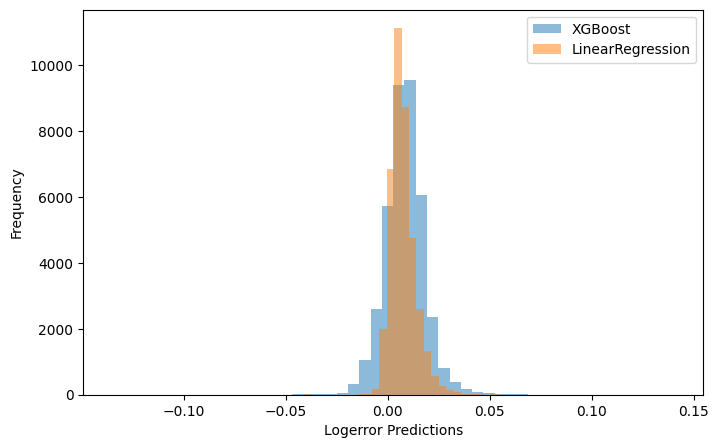

In [46]:
plt.figure(figsize=(8,5))
plt.hist(predictions_df["XGBoost"], bins=50, alpha=0.5, label="XGBoost")
plt.hist(predictions_df["LinearRegression"], bins=50, alpha=0.5, label="LinearRegression")
plt.xlabel("Logerror Predictions")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [47]:
best_models

{'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=4,
              num_parallel_tree=None, random_state=42, ...),
 'LinearRegression': LinearRegression()}

In [48]:
# Select the best model (XGBoost)
best_model = best_models['XGBoost']

# Prepare test data for 2016 and 2017
X_test_2016 = properties_2016_cleaned.drop(columns=['parcelid'], errors='ignore')
X_test_2017 = properties_2017_cleaned.drop(columns=['parcelid'], errors='ignore')

# Insert empty transactiondate column as the second column
X_test_2016.insert(0, 'transactiondate', np.nan)
X_test_2017.insert(0, 'transactiondate', np.nan)

# Create a new sample submission DataFrame
submission = pd.DataFrame()

# Assign ParcelId from properties_2016_cleaned
submission['ParcelId'] = properties_2016_cleaned['parcelid'].astype(int)

In [49]:
for col in ['201610', '201611', '201612']:
    X_test_2016['transactiondate'] = int(col)  # Update transaction date
    predictions = best_model.predict(X_test_2016)  # Make predictions
    submission[col] = predictions  # Store predictions for the corresponding month

In [50]:
# Predict for 2017 months using properties_2017_cleaned
predictions_2017 = pd.DataFrame()
predictions_2017['ParcelId'] = properties_2017_cleaned['parcelid'].astype(int)

for col in ['201710', '201711', '201712']:
    X_test_2017['transactiondate'] = int(col)  # Update transaction date
    predictions_2017[col] = best_model.predict(X_test_2017)  # Make predictions

# Merge predictions for 2017 using left join
submission = submission.merge(predictions_2017, on='ParcelId', how='left')

In [51]:
submission.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,-0.026822,-0.026822,-0.026201,-0.024794,-0.024794,-0.024794
1,10759547,0.004339,0.004339,0.005230,0.006273,0.006273,0.006273
2,10843547,-0.228259,-0.228259,-0.228129,-0.231281,-0.231281,-0.231281
3,10859147,0.039918,0.039918,0.039430,0.041295,0.041295,0.041295
4,10879947,0.030942,0.030942,0.030453,0.031988,0.031988,0.031988


In [52]:
submission.to_csv("submission.csv", index=False)